### Bibliotecas y cargar la base de datos

In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Cargar la base de datos desde un archivo CSV
data = pd.read_csv('student-por.csv')

### Análisis estadístico descriptivos

Este conjunto de datos aborda el rendimiento estudiantil en la educación secundaria de **dos** escuelas portuguesas. 

Los atributos de los datos incluyen las calificaciones de los **estudiantes, características demográficas, sociales y relacionadas con la escuela, y se recopilaron utilizando informes escolares y cuestionarios**. 

Se proporcionan dos conjuntos de datos con respecto al rendimiento en dos materias distintas: **Matemáticas (mat) y Lengua Portuguesa (por)**. En [Cortez y Silva, 2008], los dos conjuntos de datos se modelaron bajo tareas de **clasificación binaria/de cinco niveles y tareas de regresión**. 

Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la calificación del último año (emitida en el tercer período), mientras que G1 y G2 corresponden a las calificaciones del primer y segundo período. Es más difícil predecir G3 sin G2 y G1, pero dicha predicción es mucho más útil (consulte la fuente del artículo para obtener más detalles).

DataSet : https://www.kaggle.com/datasets/larsen0966/student-performance-data-set?resource=download





In [46]:
df = data.copy(deep=True)

#printing shape of the data and data info
print('Data Shape:',df.shape)
#print(df.info())
display(df.head())

Data Shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



Numeric Data Statistics


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000



Pearson's Correlation


<Axes: >

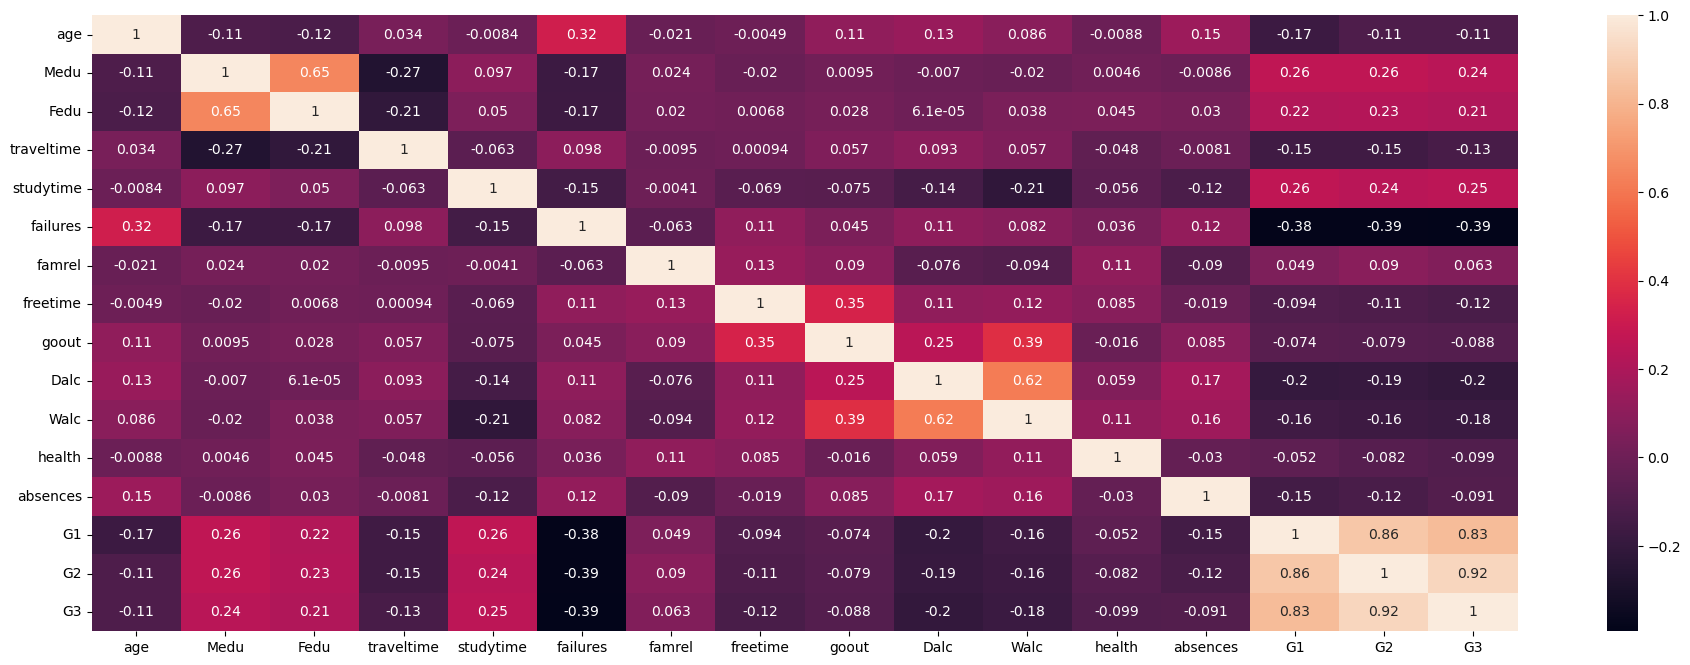

In [47]:
#Numeric data statistics
print('\nNumeric Data Statistics\033[1;0m')
display(df.select_dtypes(include=np.number).describe())
print('\nPearson\'s Correlation')
plt.figure(figsize=(23,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

El grafico decorrelacion se interpretan de la siguiente manera:

- 1  : correlación positiva total
- 0  : no hay correlación
- -1 : correlación negativa total

Donde la correlación positiva total significa que si aumenta el valor de una variable, también aumenta el valor de la otra variable. En el caso de la correlación negativa total, si aumenta el valor de una variable, disminuye el valor de la otra variable.

Que significa que tenga correlacion ?

 - Si dos variables están correlacionadas, se pueden usar para predecir una variable a partir de la otra, lo que es fundamental en la construcción de modelos predictivos.
 - En el aprendizaje automático, la correlación se utiliza para seleccionar las características más relevantes o eliminar las redundantes para mejorar la eficiencia del modelo.
 - Puede ayudar a validar hipótesis sobre las relaciones entre variables en estudios científicos y análisis de datos.

Es importante recordar que la correlación no implica causalidad. Solo porque dos variables estén correlacionadas, no significa necesariamente que una causa la otra. Puede haber factores subyacentes o desconocidos que influyan en ambas variables. Por lo tanto, al interpretar la correlación, es importante tener en cuenta el contexto y considerar otras evidencias antes de hacer afirmaciones sobre causalidad.


Con estos coeficientes de correlación podemos ver que las variables que más influyen en la nota final son G1, G2 y G3, que son las notas de los tres trimestres. 

También podemos ver que existe una correlación entre las variables de las notas de los trimestres, lo que es lógico, ya que si un alumno tiene buenas notas en el primer trimestre, es probable que también las tenga en el segundo y en el tercero.

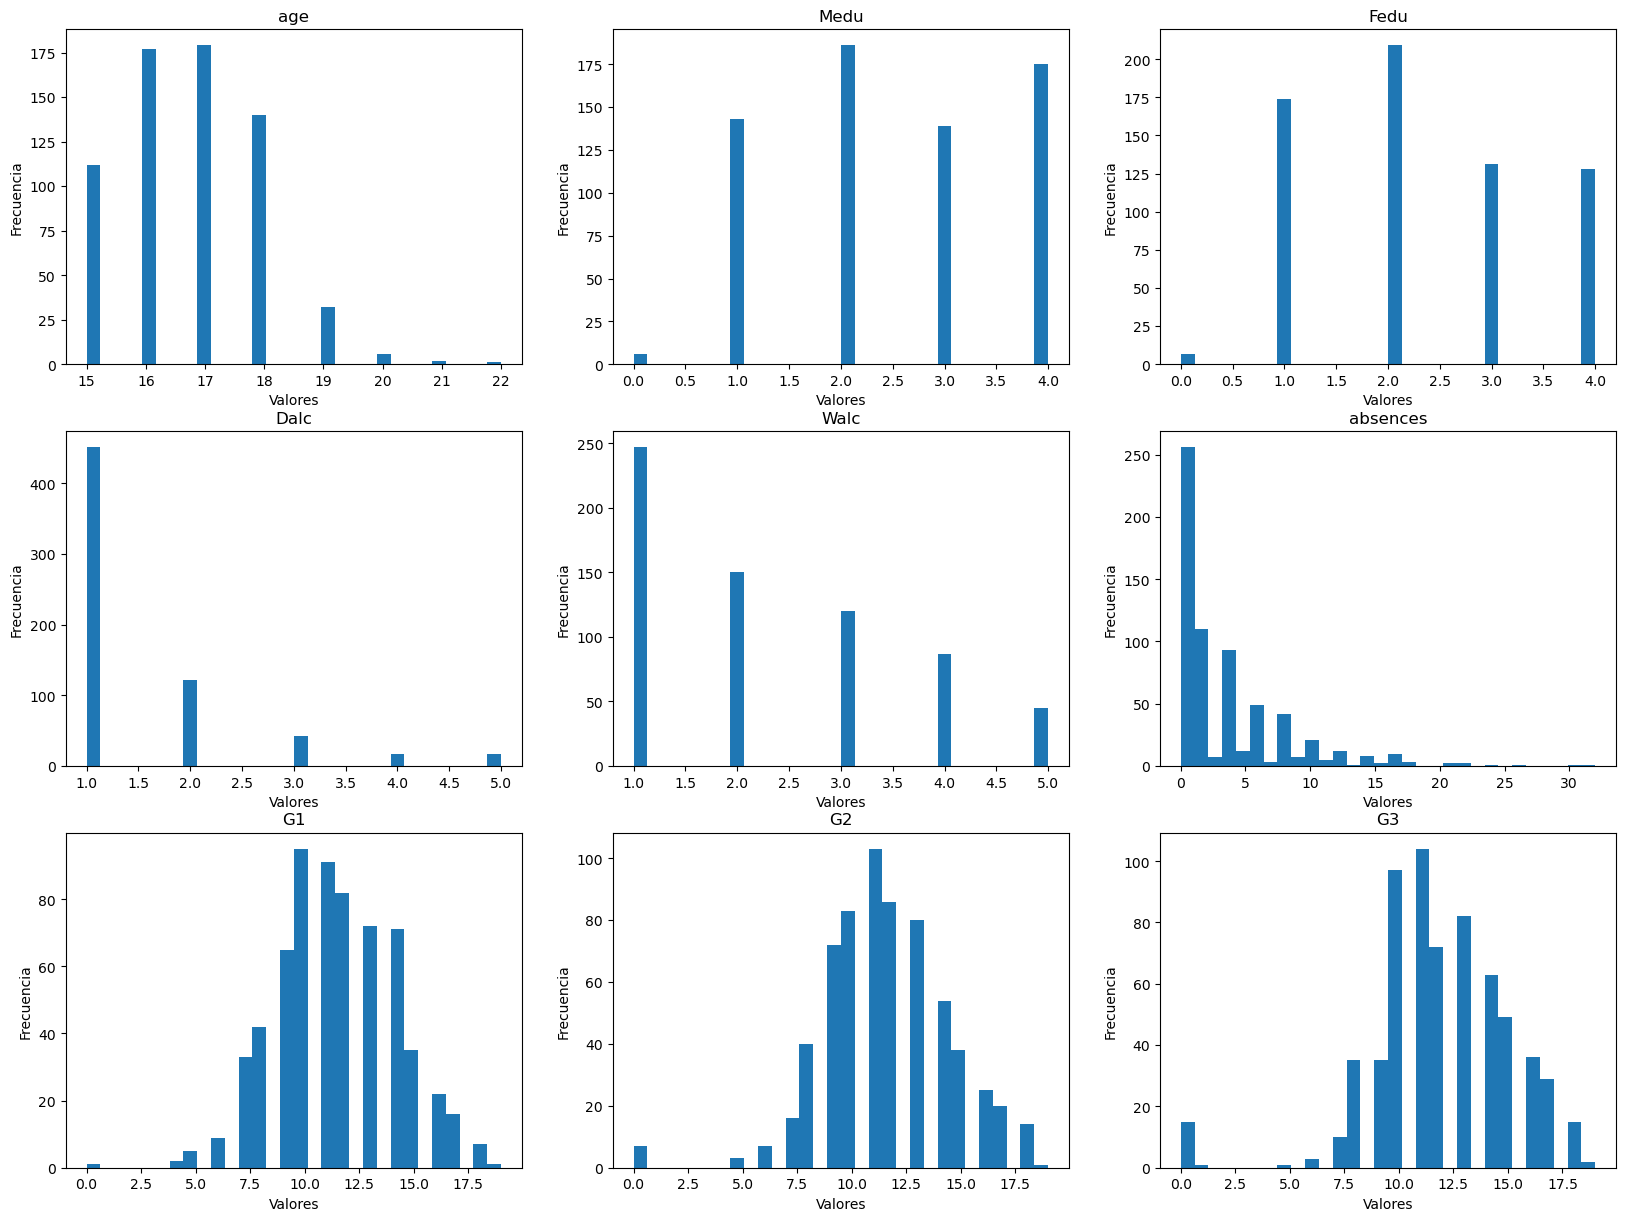

In [28]:
# Definir columnas continuas, discretas 

continua_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
discreta_columns = ['famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

continuas_seleccionadas = ["age","Medu","Fedu","Dalc","Walc","absences","G1","G2","G3"]

# Graficar histogramas de las columnas continuas 4 x 3
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(continuas_seleccionadas):
        ax.hist(df[continuas_seleccionadas[i]], bins=30)
        ax.set_title(continuas_seleccionadas[i])
        ax.set_xlabel("Valores")
        ax.set_ylabel("Frecuencia")
    else:
        ax.set_visible(False)

    

In [37]:
# 1. Media

# Calcular la media de las columnas seleccionadas
media_columnas = df[continuas_seleccionadas].mean()

# Mostrar los resultados
print('\nMedia:')
display(media_columnas)



Media:


age         16.744222
Medu         2.514638
Fedu         2.306626
Dalc         1.502311
Walc         2.280431
absences     3.659476
G1          11.399076
G2          11.570108
G3          11.906009
dtype: float64

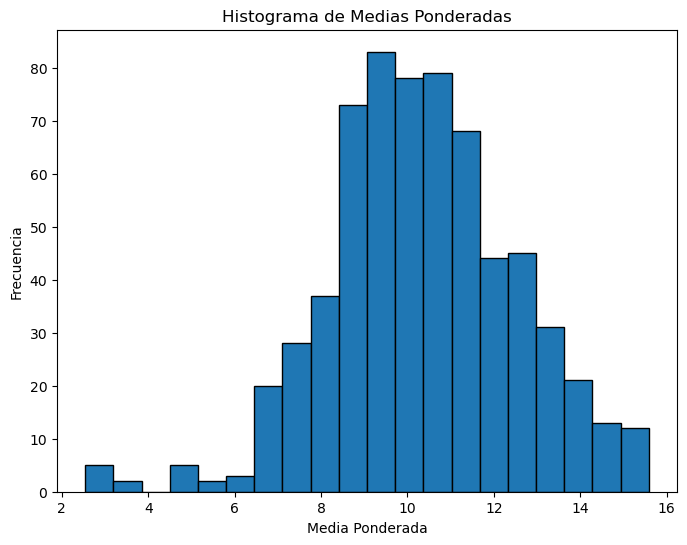

Media de las Medias Ponderadas: 10.34
Mediana de las Medias Ponderadas: 10.27
Desviación Estándar de las Medias Ponderadas: 2.17


In [55]:
# 2. Calcula la Media Ponderada de las columnas con datos continuos

# Asignar un peso igual a todas las variables continua seleccionadas 0.8 para los G1, G2 y G3 y 0.2 para las demás
pesos = [0.2, 0.2, 0.2, 0.05, 0.05, 0.05, 0.8, 0.8, 0.8]

# Calcular la media ponderada
media_ponderada = np.average(df[continuas_seleccionadas], weights=pesos, axis=1)

# Mostrar los resultados
plt.figure(figsize=(8, 6))
plt.hist(media_ponderada, bins=20, edgecolor='k')
plt.title('Histograma de Medias Ponderadas')
plt.xlabel('Media Ponderada')
plt.ylabel('Frecuencia')
plt.show()

media_ponderada_mean = np.mean(media_ponderada)
media_ponderada_median = np.median(media_ponderada)
media_ponderada_std = np.std(media_ponderada)

print(f'Media de las Medias Ponderadas: {media_ponderada_mean:.2f}')
print(f'Mediana de las Medias Ponderadas: {media_ponderada_median:.2f}')
print(f'Desviación Estándar de las Medias Ponderadas: {media_ponderada_std:.2f}')



FJAFLASFLDJALKFLK

In [57]:
# 3. Mediana

# Calcular la mediana para columnas específicas

columnas_mediana = ['age', 'G1', 'G2', 'G3']
mediana_columnas = df[columnas_mediana].median()
print("Mediana para columnas específicas:")
print(mediana_columnas)


Mediana para columnas específicas:
age    17.0
G1     11.0
G2     11.0
G3     12.0
dtype: float64


Estos valores representan el punto medio de cada una de las variables del conjunto de la base de datos. 

Variable Edad: Significa que aproximadamente la mitad de los estudiantes tienen 17 años o menos y la otra mitad tiene 17 años o más.

Variable Calificaciones: Indica que la mitad de los estudiants obtuvieron calificaciones igual o inferiores a 11 en los periodos G1 y G2, y la otra mitad obtuvo calificaciones iguales o superiores a 11 en esos períodos.


       age  Medu  Fedu  Dalc  Walc  absences    G1    G2    G3
0.10  15.0   1.0   1.0   1.0   1.0       0.0   8.0   8.0   8.8
0.25  16.0   2.0   1.0   1.0   1.0       0.0  10.0  10.0  10.0
0.50  17.0   2.0   2.0   1.0   2.0       2.0  11.0  11.0  12.0
0.75  18.0   4.0   3.0   2.0   3.0       6.0  13.0  13.0  14.0
0.90  18.0   4.0   4.0   3.0   4.0      10.0  15.0  15.0  16.0


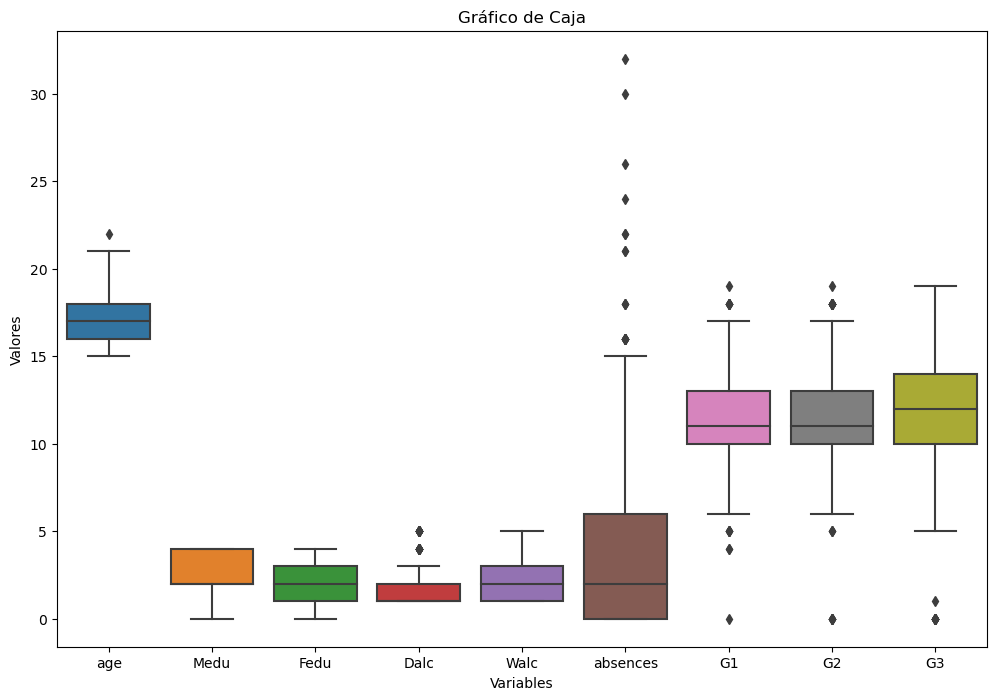

In [64]:
# 4. Percentil(10,25,50,75,90)

percentiles = df[continuas_seleccionadas].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

print(percentiles)

# Crear un gráfico de caja (boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[percentiles.columns])
plt.title('Gráfico de Caja')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()



Percentil (10): Indica el valor por debajo del cual se encuetra el 10% de los datos. La variable 'Age' el 10% de los estudiantes tienen 15 años o menos.
Percentil (25): Representa el limite inferior del primer cuartil de la distribuicion. La variable 'Age' el 25% de los estudiantes tienen 16 años o menos.
Percentil (50): Es el valor que divide en dos partes iguales la distribucion. La variable 'Age' es la mediana con 17 años.
Percentil (75): Representa el limite inferior del tercer cuartil de la distribucion. La variable 'Age' el 75% de los estudiantes tienes 18 años o menos.
Percentil (90): Indica el valor por debajo del cual se encuentra el 90% de los datos. El 90% de los estudiantes tienen 18 años o menos.

---

0.10 (10%): El 10% de los datos en cada variable es igual o menor que estos valores. Por ejemplo, en la columna "age", el 10% de los estudiantes tienen una edad de 15 años o menos.
0.25 (25%): El 25% de los datos en cada variable es igual o menor que estos valores. Esto es equivalente al primer cuartil. En la columna "Medu", el 25% de los estudiantes tiene una educación materna de 2 o menos.
0.50 (50%): El 50% de los datos en cada variable es igual o menor que estos valores, lo que equivale a la mediana. En la columna "G1", la mediana de las calificaciones del primer período es 11.
0.75 (75%): El 75% de los datos en cada variable es igual o menor que estos valores. Esto es equivalente al tercer cuartil. En la columna "Dalc", el 75% de los estudiantes tiene un consumo de alcohol durante la semana igual o menor a 2.
0.90 (90%): El 90% de los datos en cada variable es igual o menor que estos valores. Esto significa que solo el 10% de los datos restantes supera estos valores. Por ejemplo, en la columna "G3", el 90% de las calificaciones finales son 16 o menos.



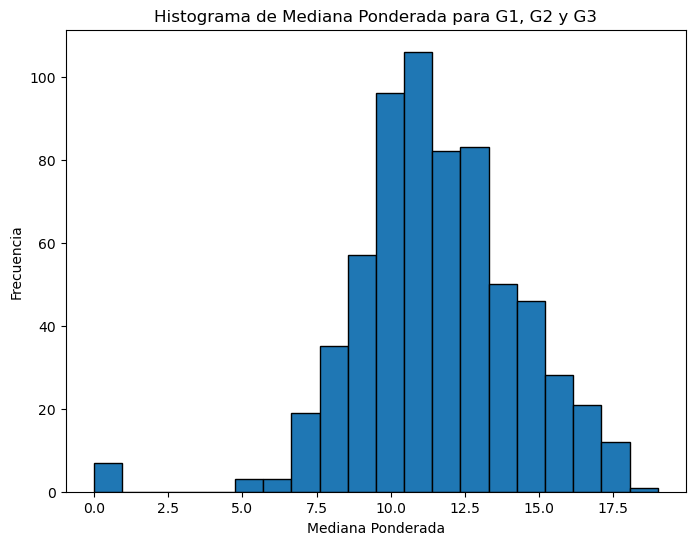

Media de la Mediana Ponderada: 11.68
Mediana de la Mediana Ponderada: 11.00


In [80]:
# 5. Mediana Ponderada(igual que 2)

# Calcular la mediana ponderada solo para las columnas "G1", "G2" y "G3"
mediana_ponderada = np.median(df[["G1", "G2", "G3"]], axis=1)

# Mostrar los resultados en un histograma
plt.figure(figsize=(8, 6))
plt.hist(mediana_ponderada, bins=20, edgecolor='k')
plt.title('Histograma de Mediana Ponderada para G1, G2 y G3')
plt.xlabel('Mediana Ponderada')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media de la mediana ponderada
media_mediana_ponderada = np.mean(mediana_ponderada)

# Mostrar el resultado de la media de la mediana ponderada
print(f"Media de la Mediana Ponderada: {media_mediana_ponderada:.2f}")
print(f"Mediana de la Mediana Ponderada: {np.median(mediana_ponderada):.2f}")



Sugiere que la mayoría de los estudiantes están obteniendo calificaciones por debajo del promedio, lo que podría indicar un rendimiento académico generalmente deficiente en estas asignaturas

In [67]:
# 6. Media Cortada(5% de datos extremos descartados)

porcentaje_descartado = 0.05
num_datos_descartados = int(len(df) * porcentaje_descartado)


g1_datos = df['G1'].values
g1_datos_ordenados = np.sort(g1_datos)
g1_datos_recortados = g1_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g1 = np.mean(g1_datos_recortados)

# Calcula la media cortada del 5% de datos extremos descartados para G2
g2_datos = df['G2'].values
g2_datos_ordenados = np.sort(g2_datos)
g2_datos_recortados = g2_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g2 = np.mean(g2_datos_recortados)

# Calcula la media cortada del 5% de datos extremos descartados para G3
g3_datos = df['G3'].values
g3_datos_ordenados = np.sort(g3_datos)
g3_datos_recortados = g3_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g3 = np.mean(g3_datos_recortados)

print("Media cortada del 5% de datos extremos descartados para G1:", media_cortada_g1)
print("Media cortada del 5% de datos extremos descartados para G2:", media_cortada_g2)
print("Media cortada del 5% de datos extremos descartados para G3:", media_cortada_g3)

Media cortada del 5% de datos extremos descartados para G1: 11.386324786324787
Media cortada del 5% de datos extremos descartados para G2: 11.601709401709401
Media cortada del 5% de datos extremos descartados para G3: 12.058119658119658


Las calificaciones promedio de los estudiantes en el primer trimestre son 11.4, en el segundo trimestre son 11.5 y en el tercer trimestre son 11.9.

Al aplicar la media cortada del 5% a las notas de los trimestres, podemos ver que la media de las notas de los trimestres es de 11.5, lo que significa que la mayoría de los estudiantes mantienen calificaciones estables.


Error Cuadrático Medio (MSE): 1.3663300054550755
Coeficiente de Determinación (R²): 0.859888248512228


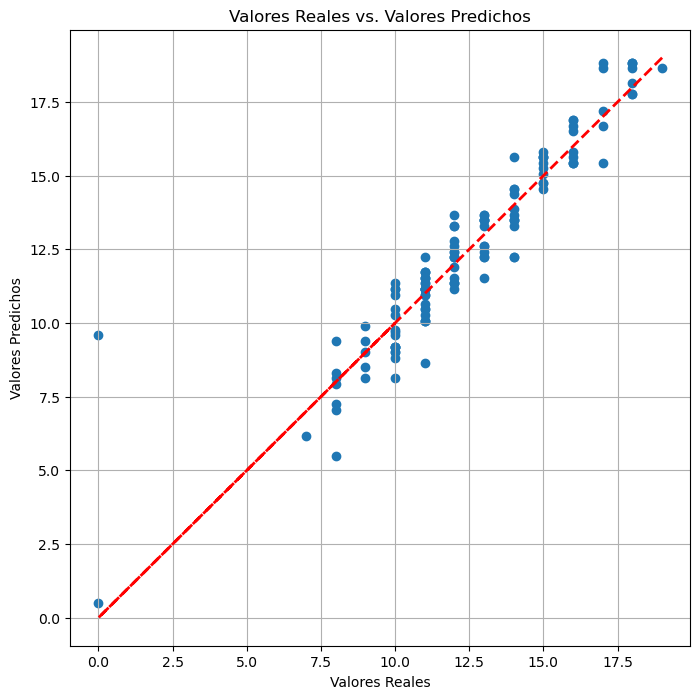

In [34]:
# 7. Error cuadrático Medio

X = df[['G1', 'G2']]  # Utiliza dobles corchetes y una lista para seleccionar múltiples columnas
y = df['G3']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# Imprimir el valor del error cuadrático medio
print('Error Cuadrático Medio (MSE):', mse)

# Imprimir el valor del coeficiente de determinación (R²)
print('Coeficiente de Determinación (R²):', r2)

# Graficar valores reales vs. valores predichos
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')

# Agregar una línea de regresión ideal (donde y_test = y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Línea de Regresión Ideal')

plt.grid(True)
plt.show()


El MSE mide la precisión promedio de las predicciones del modelo. Un valor bajo (1.37) indica buenas predicciones.

El R² indica qué tan bien el modelo se ajusta a los datos reales. Un valor alto (0.86) muestra un buen ajuste y capacidad del modelo para explicar la variabilidad en los datos.

El modelo tiene un buen desempeño en la predicción de la variable objetivo (G3) y puede explicar aproximadamente el 86% de la variabilidad en los datos.

In [77]:
# 8. Desviación estandar

desviacion_estandar = df[continuas_seleccionadas].std()

for label, value in desviacion_estandar.items():
    print(f"Desviación Estándar de {label}: {value}")

Desviación Estándar de age: 1.2181376394800618
Desviación Estándar de Medu: 1.1345519999533142
Desviación Estándar de Fedu: 1.0999309111408047
Desviación Estándar de Dalc: 0.9248344305673312
Desviación Estándar de Walc: 1.2843799719490272
Desviación Estándar de absences: 4.640758808397126
Desviación Estándar de G1: 2.7452651284463707
Desviación Estándar de G2: 2.913638664303868
Desviación Estándar de G3: 3.230656242804804


In [86]:
# 9. Rango

rango_G3 = df['G3'].max() - df['G3'].min()
rango_G2 = df['G2'].max() - df['G2'].min()
rango_G1 = df['G1'].max() - df['G1'].min()

# Imprimir el resultado
print('Rango de la variable "G3":', rango_G3)
print('Rango de la variable "G2":', rango_G2)
print('Rango de la variable "G1":', rango_G1)


Rango de la variable "G3": 19
Rango de la variable "G2": 19
Rango de la variable "G1": 19


El rango calculado significa que las calificaciones finales de los estudiantes en el conjunto de datos **varían en un rango de 19 puntos**, desde el valor mínimo hasta el valor máximo

In [ ]:
# 10. Mediana de la Desviación absoluta de la mediana

In [ ]:
# 11. Boxplot entre características

In [ ]:
# 12. Tabla de frecuencias

In [ ]:
# 13. Histogramas

In [ ]:
# 14. Moda

In [ ]:
# 15. Frecuencia

In [85]:
# 16. Graficos de barra y torta simples
()

()

In [ ]:
# 17. Coeficiente de correlación entre características o Matriz de correlación (con gráfico) 

In [ ]:
# 18. Gráfico de Dispersión entre características

In [ ]:
# 19. Gráfico de Contornos

In [ ]:
# 20. Boxplot numérico por categoría# 20.

In [ ]:
# 21. Gráfico de Violin por categoría